In [ ]:
from torchvision import datasets, transforms as T
import torch.utils.data
import torch.optim
import torchvision.models
import torch.nn as nn

In [4]:
train_transforms = T.Compose([
        
        T.Resize((100,100)),
  
        T.ToTensor()])

In [4]:
dataset = datasets.ImageFolder('./Sohas_weapon-Classification', transform=train_transforms)


In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16)

[2023-11-22 04:33:52.914 pytorch-1-13-cpu-py39-ml-t3-medium-4b3434294f9e11099fbdf101536f:25 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-11-22 04:33:54.237 pytorch-1-13-cpu-py39-ml-t3-medium-4b3434294f9e11099fbdf101536f:25 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


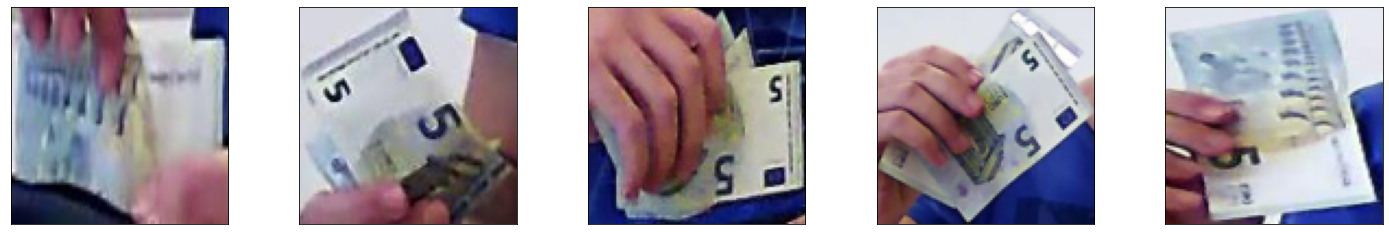

In [6]:
import matplotlib.pyplot as plt

dataiter  = iter(dataloader)
images, labels  = next(dataiter)

images = torch.permute(images, (0, 2, 3, 1)).clip(0, 1)

fig = plt.figure(figsize=(25, 4))

for idx in range(5):
        ax = fig.add_subplot(1, 5, idx + 1, xticks=[], yticks=[])
        ax.imshow(images[idx])

In [37]:
model = torchvision.models.alexnet(pretrained=True)

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [13]:
for param in model.parameters():
    if param.requires_grad:
        param.requires_grad = False

In [20]:
model.classifier = nn.Linear(9216, 6)

In [22]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=6, bias=True)
)

In [7]:
loss  = nn.CrossEntropyLoss()

In [38]:
opt = torch.optim.Adam(model.parameters(), lr=0.005)

In [27]:
if torch.cuda.is_available():
    model.cuda()
    
total = len(dataloader)*16

for epoch in range(10):
    model.train()
    train_loss = 0.0
    correct = 0
    for batch_idx, (data, target) in enumerate(dataloader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        opt.zero_grad()
        output = model(data)
        loss_value  = loss(output, target)
        loss_value.backward()
        opt.step()
        pred = output.data.max(1, keepdim=True)[1]
        correct = correct + torch.sum(torch.squeeze(pred.eq(target.data.view_as(pred))))
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss_value.data.item() - train_loss))
    acc = correct/total
    print(f'Epoch: {epoch +1} train_loss: {train_loss}')
    print(f'Epoch: {epoch +1} accuracy: {acc}')

Epoch: 1 train_loss: 50.35466597928127
Epoch: 1 accuracy: 0.9283919334411621
Epoch: 2 train_loss: 133.68741837792865
Epoch: 2 accuracy: 0.8680904507637024
Epoch: 3 train_loss: 43.865185927681544
Epoch: 3 accuracy: 0.9078726768493652
Epoch: 4 train_loss: 30.032995101738205
Epoch: 4 accuracy: 0.9243090748786926
Epoch: 5 train_loss: 24.304699789628526
Epoch: 5 accuracy: 0.9335217475891113
Epoch: 6 train_loss: 22.32991729412871
Epoch: 6 accuracy: 0.9381281137466431
Epoch: 7 train_loss: 20.21494688986325
Epoch: 7 accuracy: 0.9409547448158264
Epoch: 8 train_loss: 19.50033006951475
Epoch: 8 accuracy: 0.9424204230308533
Epoch: 9 train_loss: 18.938340164390446
Epoch: 9 accuracy: 0.9434673190116882
Epoch: 10 train_loss: 18.53098214973724
Epoch: 10 accuracy: 0.9436767101287842


In [28]:
torch.save(model.state_dict(), './Trained-Models/alexnet.pt')

In [9]:
model_reload = torchvision.models.alexnet(pretrained=True)
model_reload.classifier = nn.Linear(9216, 6)

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model_reload.load_state_dict(torch.load('./Trained-Models/alexnet.pt', map_location='cpu'))

<All keys matched successfully>

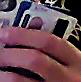

In [30]:
from PIL import Image 
  
im = Image.open(r'./Sohas_weapon-Classification/tarjeta/1bil1tar_0002_box3.jpg')  
   
im.show() 

In [31]:
convert_tensor = T.ToTensor()
im =convert_tensor(im)

In [32]:
with torch.no_grad():
    model_reload.eval()
    out=model_reload(im.unsqueeze(dim=0))

In [33]:
import torch.nn.functional as F
x  = F.softmax(out, dim=1)

In [34]:
x

tensor([[0., 0., 0., 0., 0., 1.]])

In [35]:
out

tensor([[1504.1710,  232.2393, -303.9584, 1862.5577, -409.0638, 2600.6663]])